In [1]:
import uproot
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
plt.rcParams["figure.dpi"] = 100
plt.rcParams["text.usetex"] = True

In [3]:
def read_tree(path, tree):
    return uproot.open(path)[tree].pandas.df()

def calc_xw(x, w, bins):
    count, _ = np.histogram(x, bins=bins)
    hist, _ = np.histogram(x, bins=bins, weights=w)
    hist /= count
    return bins[:-1], hist

In [4]:
bins = np.linspace(-5, 5, 201)

configs = [
    {
        "label": "BeamPipe",
        "path": "data/matbdg_det-Beam.root",
        "tree": "T1",
        "color": "#cab2d6",
    }, {
        "label": "Tracker",
        "path": "data/matbdg_det-Tracker.root",
        "tree": "T1",
        "color": "#a6cee3",
    }, {
        "label": "ECAL",
        "path": "data/matbdg_det-ECAL.root",
        "tree": "T1",
        "color": "#b2df8a",
    }, {
        "label": "HCAL",
        "path": "data/matbdg_det-HCAL.root",
        "tree": "T1",
        "color": "#fdbf6f",
    }, {
        "label": "Magnet",
        "path": "data/matbdg_det-Magnet.root",
        "tree": "T1",
        "color": "#d9d9d9",
    }, {
        "label": "Muon",
        "path": "data/matbdg_det-Muon.root",
        "tree": "T1",
        "color": "#fb9a99",
    }
]

In [5]:
for config in configs:
    df = read_tree(config["path"], config["tree"])
    df.to_hdf(
        "data/matbdg.h5", config["label"],
        format='table', append=False,
        complib='zlib', complevel=9,
    )

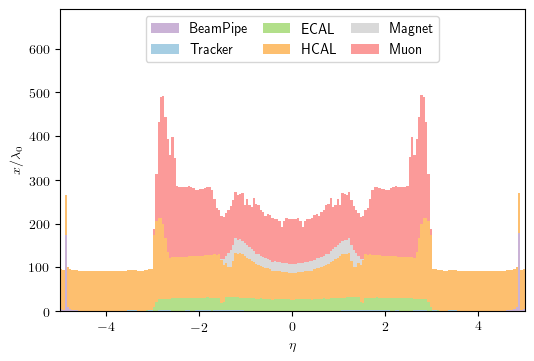

In [6]:
data = {
    "xvalue": [],
    "wvalue": [],
    "labels": [],
    "colors": [],
}
for config in configs:
    df = read_tree(config["path"], config["tree"])
    x, w = calc_xw(df["Particle Eta"], df["MB"], bins)
    data["xvalue"].append(x)
    data["wvalue"].append(w)
    data["labels"].append(config["label"])
    data["colors"].append(config["color"])
    
plt.hist(
    data["xvalue"], bins=bins, weights=data["wvalue"],
    label=data["labels"], color=data["colors"], stacked=True,
)
plt.legend(
    columnspacing=1.,
    loc=9, ncol=3,
)
plt.xlim(-5, 5)
plt.ylim(0, 1.4*sum(data["wvalue"]).max())
plt.xlabel('$\eta$')
plt.ylabel('$x/\lambda_0$')
plt.savefig(
    "images/radiation_lengths.pdf",
    bbox_inches='tight',
)
pass

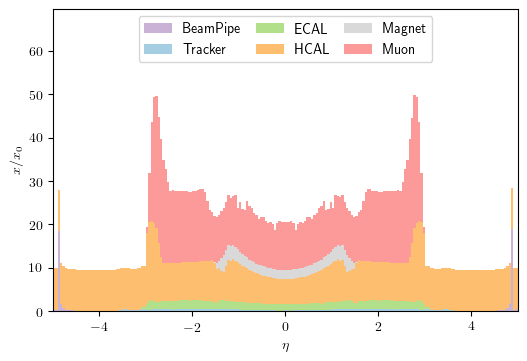

In [7]:
data = {
    "xvalue": [],
    "wvalue": [],
    "labels": [],
    "colors": [],
}
for config in configs:
    df = read_tree(config["path"], config["tree"])
    x, w = calc_xw(df["Particle Eta"], df["IL"], bins)
    data["xvalue"].append(x)
    data["wvalue"].append(w)
    data["labels"].append(config["label"])
    data["colors"].append(config["color"])
    
plt.hist(
    data["xvalue"], bins=bins, weights=data["wvalue"],
    label=data["labels"], color=data["colors"], stacked=True,
)
plt.legend(
    columnspacing=1.,
    loc=9, ncol=3,
)
plt.xlim(-5, 5)
plt.ylim(0, 1.4*sum(data["wvalue"]).max())
plt.xlabel('$\eta$')
plt.ylabel('$x/x_0$')
plt.savefig(
    "images/interaction_lengths.pdf",
    bbox_inches='tight',
)
pass